# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. Obtain salary data using `wget` from [here](https://raw.githubusercontent.com/solarillion/MLBasics/master/Data/Salary_Data.csv). <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [54]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [55]:
df = pd.read_csv('Data/Salary_data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [56]:
X = df['YearsExperience'].to_list()
y = df['Salary'].to_list()

## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

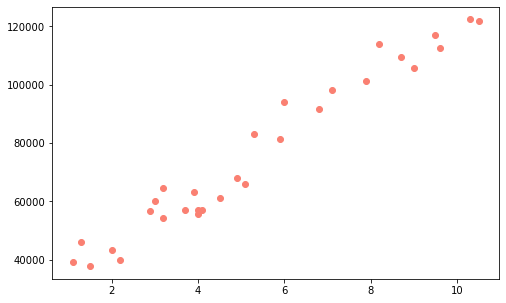

In [57]:
plt.figure(figsize = (8, 5))
plt.scatter(X, y, 
            color = 'salmon');


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [59]:
def LinearRegression(train, epochs, lr):
    m = 0
    b = 0
    num = len(train)
    
    for i in range(epochs):
        m_grad, b_grad = gradient_descent(train, num, m, b)
        m = m - (lr * m_grad)
        b = b - (lr * b_grad)
    return [m, b]

In [60]:
def gradient_descent(train, n, m, b):
    m_grad = 0
    b_grad = 0
    
    for j in range(n):
        X = train.iloc[j].YearsExperience
        y = train.iloc[j].Salary
        m_grad += -((2/n) * (X) * (y - (m * X + b)))
        b_grad += -((2/n) * (y - (m * X + b)))
    
    return m_grad, b_grad

In [61]:
train = pd.DataFrame()
train['YearsExperience']= X_train
train['Salary'] = y_train

test = pd.DataFrame()
test['YearsExperience'] = X_test
test['Salary'] = y_test

In [62]:
model = LinearRegression(train, epochs = 1000, lr = 0.01)
m, b = model
print(m, b)

9293.112201720223 27634.770396516877


In [63]:
y_pred = []
for i in X_test:
    pred = m * i + b
    y_pred.append(pred)
#print(y_pred)
#print(test['Salary'])

In [64]:
X = np.array(X)
def model_plot(model, X_train, X_test, y_train, y_test):
    plt.scatter(X_train, y_train, color = 'lightblue', label = 'TrainingData')
    plt.scatter(X_test, y_test, color = 'salmon', label = 'TestData')

    plt.xlabel('YOE')
    plt.ylabel('Salary')
    
    plt.plot(X, m * X + b, label='Regression Line', color = 'black', linewidth = 0.4)
    plt.legend()

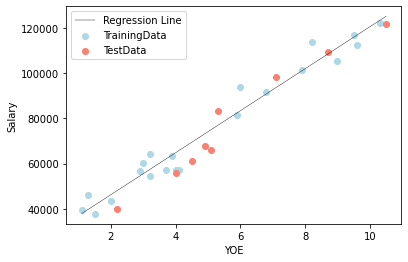

In [65]:
model_plot(model, X_train, X_test, y_train, y_test)

## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

In [66]:
df['Salary<60000'] = df['Salary'].apply(lambda x: 1 if x < 60000 else 0)
df.tail()

,YearsExperience,Salary,Salary<60000
25,9.0,105582.0,0
26,9.5,116969.0,0
27,9.6,112635.0,0
28,10.3,122391.0,0
29,10.5,121872.0,0


In [67]:
X = df['YearsExperience']
y = df['Salary<60000']

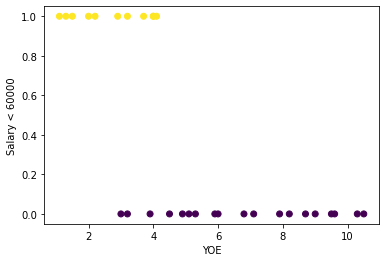

In [68]:
plt.figure(figsize = (6, 4))
plt.scatter(X, y, c = df['Salary<60000'])
plt.xlabel("YOE")
plt.ylabel("Salary < 60000");

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [70]:
epochs = 1000
lr = 0.01
t_0 = 0
t_1 = 0

In [71]:
def LogisticRegression(x, theta_0, theta_1):
    return 1 / (1 + math.exp(-(theta_0 + theta_1 * x)))

In [72]:
#GD
for _ in range(epochs):
    pred = X_train.apply(LogisticRegression, args=(t_0, t_1,))
    
    theta_0_new = t_0 + lr * (y_train - pred).sum()
    theta_1_new = t_1 + lr * ((y_train - pred) * X_train).sum()
    
    t_0 = theta_0_new
    t_1 = theta_1_new

In [73]:
def model(x):
    exponent = t_0 + t_1 * x
    return 1 / (1 + math.exp(-exponent))

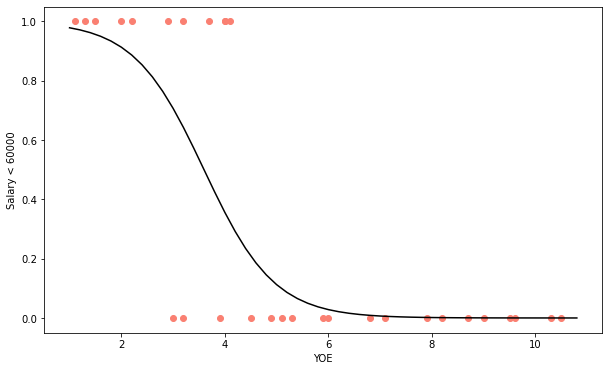

In [32]:
x = np.arange(1, 11., 0.2)
sig = [model(i) for i in x]

plt.figure(figsize=(10,6))
plt.xlabel('YOE')
plt.ylabel('Salary < 60000')
plt.scatter(df['YearsExperience'], df['Salary<60000'], c='salmon')
plt.plot(x, sig, color = 'black')
plt.show()

In [74]:
y_pred = []
for i in X_test:
    pred = LogisticRegression(i, t_0, t_1)
    y_pred.append(round(pred, 0))
#print(y_pred)
#print(y_test)

## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.

In [ ]:
#Linear Regression results by manual calculation
ytest = np.array(y_test)
ypred = np.array(y_pred)
d = ytest - ypred


mse_f = np.mean(d ** 2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1 - (sum(d ** 2) / sum((y - np.mean(y)) ** 2))

print("Results by manual calculation:")
print("MAE:", mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

In [ ]:
#Linear Regression results using Scikit-Learn
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

mae = mean_absolute_error(ytest, ypred)
mse = mean_squared_error(ytest, ypred)
rmse = mse ** 0.5  
r2 = r2_score(ytest, ypred)

print("Results from sklearn.metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

In [75]:
#Logistic Regression results by manual calculation
y_test = np.array(y_test)
y_pred = np.array(y_pred)
correct = np.sum(y_pred == y_test)
total = y_pred.size
accuracy = correct / total

print(accuracy)

0.6666666666666666


In [76]:
#Logistic Regression results using Scikit-Learn
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.6666666666666666